In [45]:
import pandas as pd
import numpy as np

#从input文件夹读入数据
import os
for dirname, _, filenames in os.walk('./input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./input/sample_submission.csv
./input/test.csv
./input/train.csv


In [46]:
import pandas as pd
df = pd.read_csv('./input/train.csv')
test_df = pd.read_csv('./input/test.csv')

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1117957.0,558978.000000,322726.531784,0.000,279489.00,558978.000,838467.00,1117956.000
MonsoonIntensity,1117957.0,4.921450,2.056387,0.000,3.00,5.000,6.00,16.000
TopographyDrainage,1117957.0,4.926671,2.093879,0.000,3.00,5.000,6.00,18.000
RiverManagement,1117957.0,4.955322,2.072186,0.000,4.00,5.000,6.00,16.000
Deforestation,1117957.0,4.942240,2.051689,0.000,4.00,5.000,6.00,17.000
Urbanization,1117957.0,4.942517,2.083391,0.000,3.00,5.000,6.00,17.000
ClimateChange,1117957.0,4.934093,2.057742,0.000,3.00,5.000,6.00,17.000
DamsQuality,1117957.0,4.955878,2.083063,0.000,4.00,5.000,6.00,16.000
Siltation,1117957.0,4.927791,2.065992,0.000,3.00,5.000,6.00,16.000
AgriculturalPractices,1117957.0,4.942619,2.068545,0.000,3.00,5.000,6.00,16.000


In [48]:
df.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,4,2,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,6,9,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,5,6,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,8,5,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,3,5,2,2,6,6,4,1,2,3,5,0.415


In [49]:
#print(df.isnull().sum())
len(df)
print(df.columns)
print(test_df.columns)

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')
Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors'],
      dtype='object')


<Axes: xlabel='FloodProbability'>

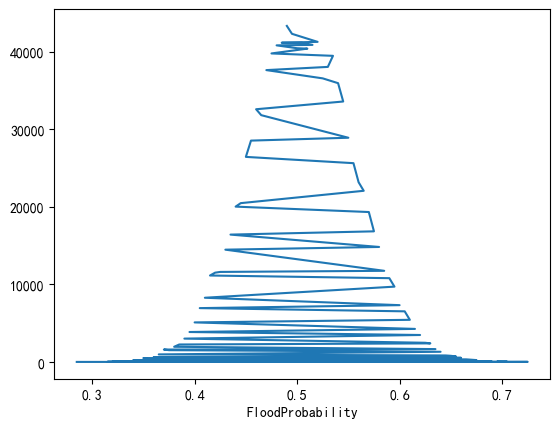

In [50]:
df['FloodProbability'].value_counts().plot()

### 分别绘制各自变量与因变量的关系图（二选一）

In [51]:
# import seaborn as sns
# for feature in df.columns:
#     if feature not in ['id','FloodProbability']:
#         sns.catplot(x=feature,y='FloodProbability',data=df,kind='point')

### 绘制各变量热力图（二选一）

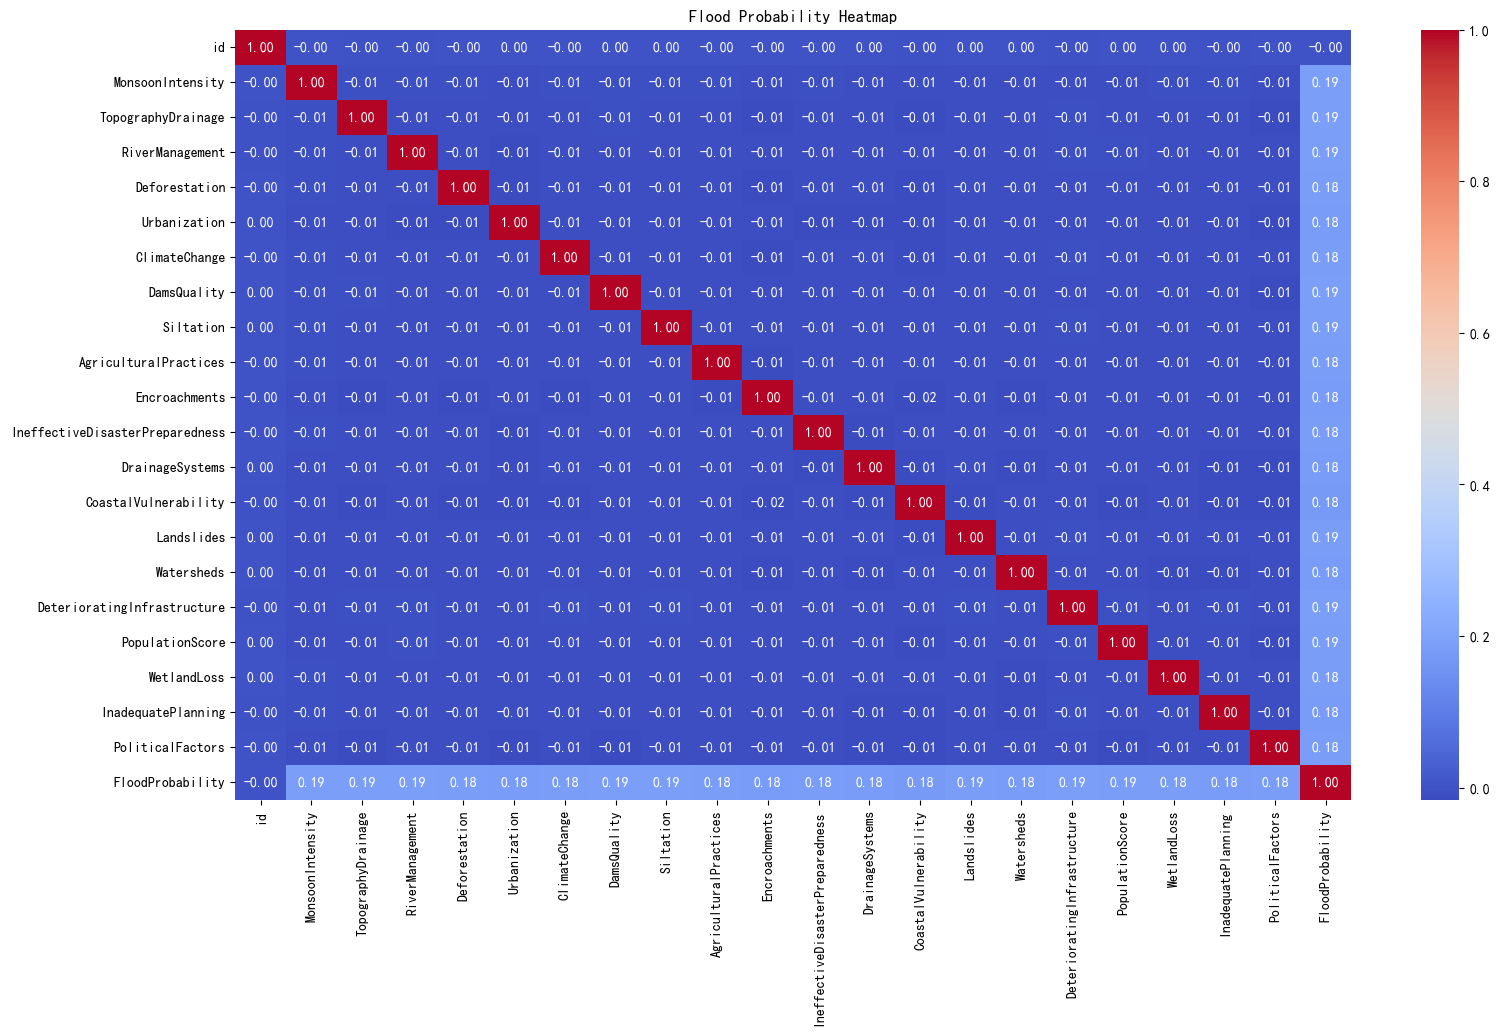

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(18,10))
sns.heatmap(df.corr(), annot=True, cmap= 'coolwarm', fmt=".2f")
plt.title('Flood Probability Heatmap')
plt.show()

In [52]:
target = df['FloodProbability']
features = df.drop(['id', 'FloodProbability'], axis=1) #删除两列非特征变量
features_test = test_df.drop(['id'], axis=1)

In [54]:
import pandas as pd
import numpy as np

threshold = 11

#Function to apply segmented transformation
def segmented_transformation(features, threshold):
    linear_segment = np.where(features <= threshold, features, 0)
    nonlinear_segment = np.where(features > threshold, features, 0)
    
    transformed_features = linear_segment + 0.5 * nonlinear_segment ** 2 + 0.5 *nonlinear_segment ** 3
    
    return transformed_features

#Apply the transformation to each feature in the DataFrame
for col in features.columns:
    features[col] = segmented_transformation(features[col], threshold)
for col in features_test.columns:
    features_test[col] = segmented_transformation(features_test[col], threshold)


In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import SplineTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

#Creating a Spline Transformer(创建样条变换器)
spline_transformer = SplineTransformer(degree=6, n_knots=6, knots='uniform', include_bias=False)

#Creating a Pipeline with Linear Regression
pipeline = make_pipeline(spline_transformer, LinearRegression())

#Splitting the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=73)

#Fitting the model
pipeline.fit(X_train, y_train)

#Predicting
y_pred = pipeline.predict(X_test)

#Evaluating the model
r2score = r2_score(y_test, y_pred)
print(f'R² Score: {r2score}')

R² Score: 0.8471787191758684


In [56]:
y_pred_test = pipeline.predict(features_test)
print(y_pred_test)

[0.57399964 0.45532088 0.45436467 ... 0.62464116 0.55092556 0.51133996]


In [57]:
submission_df = pd.DataFrame({
    'id': test_df['id'],
    'FloodProbability': y_pred_test
})

#Saving the submission file to a CSV file
submission_df.to_csv('./output/submission.csv', index=False)

print("Submission file created successfully!")

Submission file created successfully!


In [58]:
pd.read_csv('./output/submission.csv')

,id,FloodProbability
0,1117957,0.574000
1,1117958,0.455321
2,1117959,0.454365
3,1117960,0.466229
4,1117961,0.466186
...,...,...
745300,1863257,0.477221
745301,1863258,0.449838
745302,1863259,0.624641
745303,1863260,0.550926
